# Rudimentary analysis: Using the NLTK to do some simple "reading"

In this notebook, you will define a file for analysis, and the script will output interesting features & characteristics of the text. --Eric Lease Morgan

In [1]:
# configure; define some constants
CARREL   = 'CodeOfConduct4Lib-2021-03-10'
TEMPLATE = './carrels/%s/etc/reader.txt'
LANGUAGE = 'english'
KEYWORD  = 'community'
KEYWORDS = [ 'community', 'support', 'squad']


In [2]:
# require
from nltk import *


In [3]:
# read the given file, tokenize it, normalize it, and create an NLTK "Text object" from the result
file   = TEMPLATE % CARREL
data   = open( file ).read()
tokens = word_tokenize( data )
tokens = [ token.lower() for token in tokens ] 
text   = Text( tokens )


In [4]:
text.collocations()

code lib; phone number; community support; support volunteers;
publicly-accessible website; speaking directly; specified time; time
period; corrective action; either indefinitely; comfortable speaking;
feel comfortable; mailing list; support volunteer; support squad;
harassing behavior; lib irc; lib event


In [5]:
# count
text.count( KEYWORD )

20

In [6]:
# compute relative weight percentage of a word (count/total words); to what degree is this word "significant"?
count      = text.count( KEYWORD )
total      = len( tokens )
percentage = 100 * count / total
print( percentage )

1.3995801259622114


In [7]:
# compare the relative weights (percentages) of many words; begin by (re-)initializing
total       = len( tokens )
percentages = {}

# process each of the given keywords
for keyword in KEYWORDS :
    
    # calculate
    count      = text.count( keyword )
    percentage = 100 * count / total
    
    # update the list of weights
    percentages[ keyword ] = percentage

# sort the weights by value; very Pythonic
percentages = { key:value for key, value in sorted( percentages.items(), key=lambda item:item[ 1 ], reverse=True ) }

# output
print( "\t".join( ( 'keyword', 'percentage') ) )
for keyword in percentages :
    percentage = str( percentages[ keyword ] )
    print( "\t".join( ( keyword, percentage ) ) )


keyword	percentage
community	1.3995801259622114
support	0.7697690692792163
squad	0.13995801259622112


In [8]:
# concordance
text.concordance( KEYWORD )

Displaying 20 of 20 matches:
 and safe conference ( and ongoing community ) experience for everyone . we do 
t venue , including talks , or any community channel such as the chatroom or ma
f you are at a conference or other community event , find the on-call community
community event , find the on-call community support volunteer or the event org
as the conference website , in the community support squad volunteers list , or
ction . the primary way to reach a community support volunteer online is to ema
to the csv list are visible to all community support volunteers and are kept pr
at most times . helpers may not be community support volunteers but know how to
vate message a known member of the community support squad ; their names and sl
or , you will know if someone is a community support volunteer by clicking on t
e morgan . in addition , there are community support volunteers whom you are we
you are welcome to involve . wider community response to incident : if the inci
ered and ac

In [9]:
for keyword in sorted( KEYWORDS ) :
    pattern = ( '<%s> <is> <.*>' % ( keyword ) )
    text.findall( pattern )
    print()

community is informed







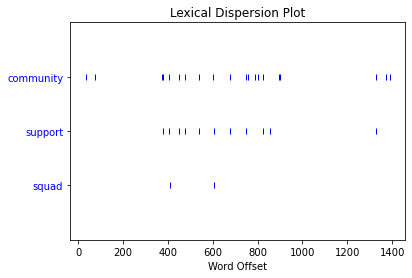

In [10]:
# dispersion plot; where do the keyword appear
text.dispersion_plot( KEYWORDS )


In [11]:
# similar words
for keyword in sorted( KEYWORDS ) :
    print( "%s" % ( keyword ) )
    text.similar( keyword )
    print()


community
event help

squad


support
revise

